In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
df=pd.read_csv("./data/Diabetes.csv")

In [5]:
df=df.drop('Unnamed: 0',axis=1)

In [6]:
df["group"].unique()

array(['Normal', 'Chemical_Diabetic', 'Overt_Diabetic'], dtype=object)

In [7]:
df["group"]=df["group"].map({'Normal':0, 'Chemical_Diabetic':1, 'Overt_Diabetic':2})

In [8]:
df_x=df.drop('group',axis=1)
df.corr()


,relwt,glufast,glutest,instest,sspg,group
relwt,1.000000,-0.008813,0.023984,0.222238,0.384320,0.214554
glufast,-0.008813,1.000000,0.964628,-0.396235,0.715480,0.730553
glutest,0.023984,0.964628,1.000000,-0.337020,0.770942,0.836725
instest,0.222238,-0.396235,-0.337020,1.000000,0.007914,-0.113782
sspg,0.384320,0.715480,0.770942,0.007914,1.000000,0.783481
group,0.214554,0.730553,0.836725,-0.113782,0.783481,1.000000


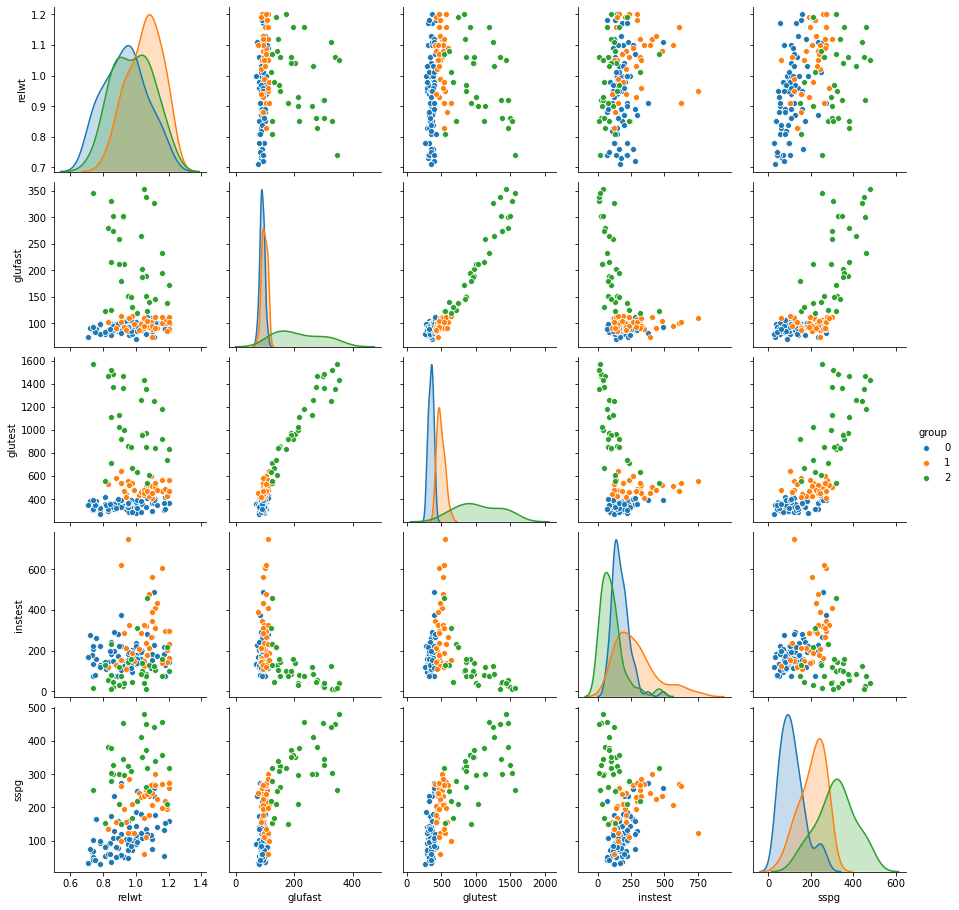

In [7]:
sns.pairplot(df, hue='group')
#correlaiton.no normal distribution indicatea not malti variable 



In [9]:
df_0=df.loc[df.group==0]
df_1=df.loc[df.group==1]
df_2=df.loc[df.group==2]
df_e0=df.loc[df.group!=0]
df_e1=df.loc[df.group!=1]
df_e2=df.loc[df.group!=2]


In [10]:
df_0.cov()


,relwt,glufast,glutest,instest,sspg,group
relwt,0.016524,0.315049,0.978460,0.518205,3.295733,0.0
glufast,0.315049,67.698947,86.271579,19.079649,46.813333,0.0
glutest,0.978460,86.271579,1359.439298,574.657193,446.026667,0.0
instest,0.518205,19.079649,574.657193,4740.845439,1955.920000,0.0
sspg,3.295733,46.813333,446.026667,1955.920000,3310.026667,0.0
group,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [11]:
df_1.cov()

,relwt,glufast,glutest,instest,sspg,group
relwt,0.010208,-0.067262,-1.522810,1.066571,2.891310,0.0
glufast,-0.067262,90.046825,319.560317,154.114286,-23.448413,0.0
glutest,-1.522810,319.560317,3070.453968,1082.514286,-141.830159,0.0
instest,1.066571,154.114286,1082.514286,24910.857143,3262.228571,0.0
sspg,2.891310,-23.448413,-141.830159,3262.228571,3595.113492,0.0
group,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [12]:
df_2.cov()

,relwt,glufast,glutest,instest,sspg,group
relwt,0.014468,-2.574583,-13.667765,3.514375,3.021117,0.0
glufast,-2.574583,5861.916667,22623.104167,-4479.625000,3948.302083,0.0
glutest,-13.667765,22623.104167,95725.439394,-19843.187500,15333.813447,0.0
instest,3.514375,-4479.625000,-19843.187500,8728.250000,-1653.843750,0.0
sspg,3.021117,3948.302083,15333.813447,-1653.843750,7800.797348,0.0
group,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [20]:
df_e1.corr()

,relwt,glufast,glutest,instest,sspg,group
relwt,1.000000,0.077834,0.076377,0.070134,0.352158,0.169224
glufast,0.077834,1.000000,0.972987,-0.522435,0.801472,0.810204
glutest,0.076377,0.972987,1.000000,-0.511075,0.831174,0.881891
instest,0.070134,-0.522435,-0.511075,1.000000,-0.212193,-0.372361
sspg,0.352158,0.801472,0.831174,-0.212193,1.000000,0.812311
group,0.169224,0.810204,0.881891,-0.372361,0.812311,1.000000


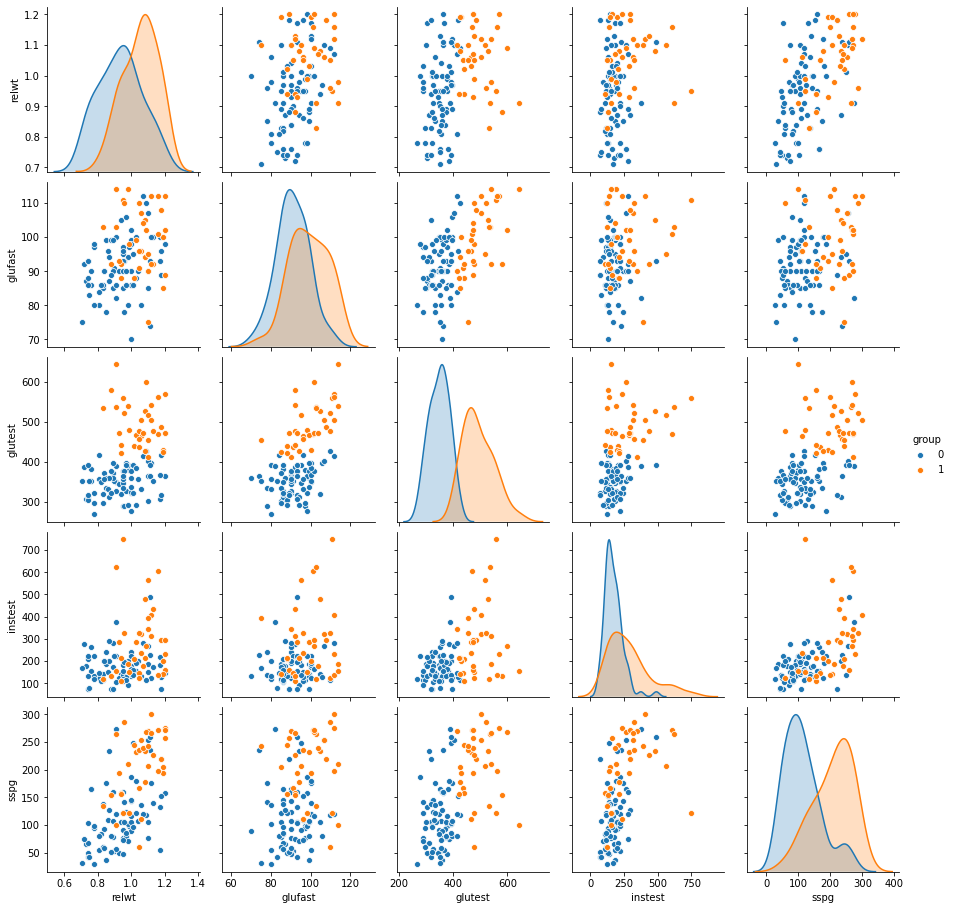

In [35]:
sns.pairplot(df_e2, hue='group')

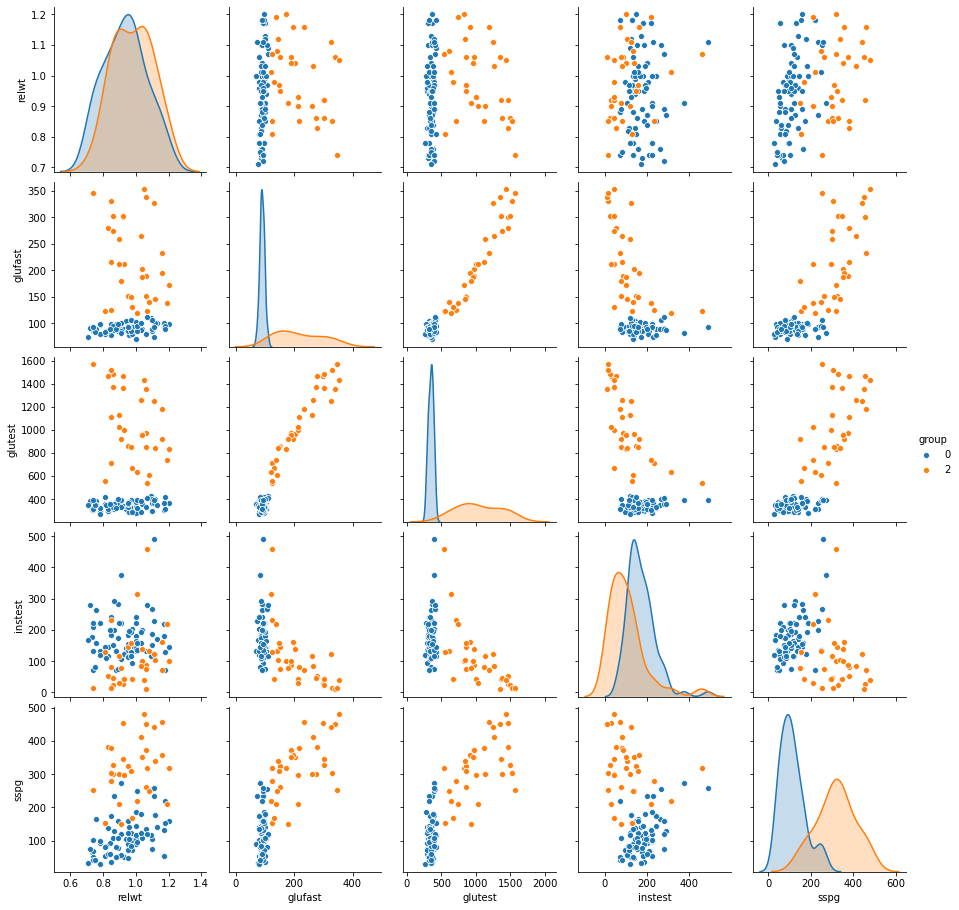

In [36]:
sns.pairplot(df_e1, hue='group')

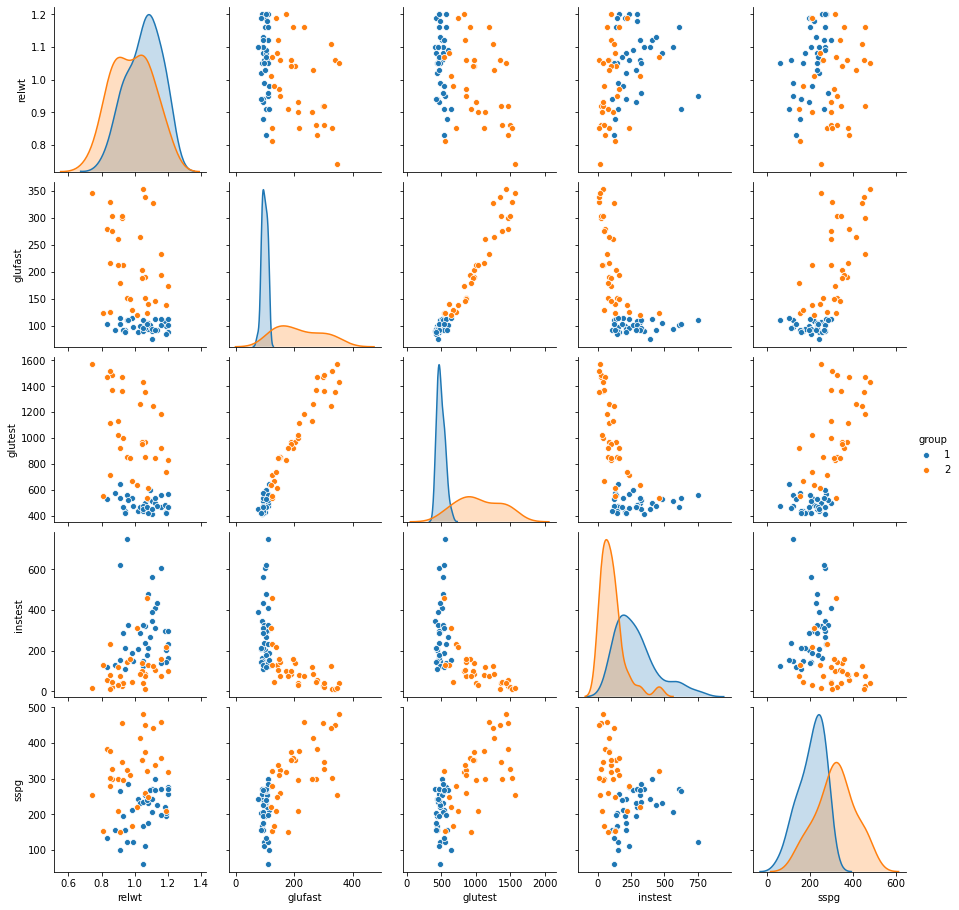

In [13]:
sns.pairplot(df_e0, hue='group')

In [21]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#http://lijiancheng0614.github.io/scikit-learn/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html#sklearn.decomposition.LatentDirichletAllocation.fit_transform
#https://blog.naver.com/jaehong7719/221926671654
#https://blog.naver.com/powerparan/221867153428

#***https://blog.naver.com/sanghan1990/221126257295***



In [43]:
X=df.drop('group',axis=1)
X
y=df.group
y

0      0
1      0
2      0
3      0
4      0
      ..
140    2
141    2
142    2
143    2
144    2
Name: group, Length: 145, dtype: int64

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

,relwt,glufast,glutest,instest,sspg
0,0.81,80,356,124,55
1,0.95,97,289,117,76
2,0.94,105,319,143,105
3,1.04,90,356,199,108
4,1.00,90,323,240,143
...,...,...,...,...,...
140,1.05,353,1428,41,480
141,0.91,180,923,77,150
142,0.90,213,1025,29,209
143,1.11,328,1246,124,442


In [45]:
model1 = QuadraticDiscriminantAnalysis().fit(X,y)
model2 = LinearDiscriminantAnalysis().fit(X,y)

In [46]:
yhat1 = model1.predict(X)
yhat2 = model2.predict(X)

In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(y, yhat1))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        76
           1       0.89      0.92      0.90        36
           2       1.00      0.91      0.95        33

    accuracy                           0.95       145
   macro avg       0.95      0.94      0.94       145
weighted avg       0.95      0.95      0.95       145



In [48]:
confusion_matrix(y,yhat1)

array([[75,  1,  0],
       [ 3, 33,  0],
       [ 0,  3, 30]], dtype=int64)

In [49]:
confusion_matrix(y,yhat2)

array([[73,  3,  0],
       [ 5, 31,  0],
       [ 1,  5, 27]], dtype=int64)

131

145

In [50]:
v1=pd.DataFrame([1.86,184,68,122,544]).transpose()
v1

,0,1,2,3,4
0,1.86,184.0,68.0,122.0,544.0


In [51]:

model2.predict(v1)

array([0], dtype=int64)

In [52]:
model1.predict(v1)

array([2], dtype=int64)

In [53]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score

In [54]:
fpr, tpr, thresholds = metrics.roc_curve(y, yhat1, pos_label=2)
metrics.auc(fpr, tpr)

0.9862012987012987

In [55]:
fpr, tpr, thresholds = metrics.roc_curve(y, yhat2, pos_label=2)
metrics.auc(fpr, tpr)

0.9572510822510822

SyntaxError: invalid syntax (<ipython-input-38-4326512d94da>, line 1)

0.009900990099009901

0.03571428571428571

0.047619047619047616